## Honda Case Competition (Project by Hyoju Kang, Raymond David, Angel Hsu)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set_style('darkgrid')
import statsmodels.api as sm
import plotly.express as px
from IPython.display import Image

#number of electric vehicle sold worldwide by year
Sales = pd.read_csv('Desktop/Honda Competition/Datasets/IEA-EV-dataEV salesCarsHistorical.csv')
#CO2 emission in pounds per vehicle type
contribution = pd.read_csv('Desktop/Honda Competition/Datasets/EV contribution.csv')
#Price for Gasoline and Electricity for every states in US
Fuel_Price = pd.read_csv('Desktop/Honda Competition/Datasets/Price_Gas and eGallon.csv')
#Electric Vehicle models in US with features
Alt_data = pd.read_csv('Desktop/Honda Competition/Datasets/Alternative Fuel Vehicles US.csv')
#Electric Vehicle registered in Washington State, but there are 4318 other state values included in the dataset
electric_pop = pd.read_csv('Desktop/Honda Competition/Datasets/Electric_Vehicle_Population_Data.csv')
#Key features of electric cars
feature = pd.read_csv('Desktop/Honda Competition/Datasets/Cheapestelectriccars-EVDatabase.csv')

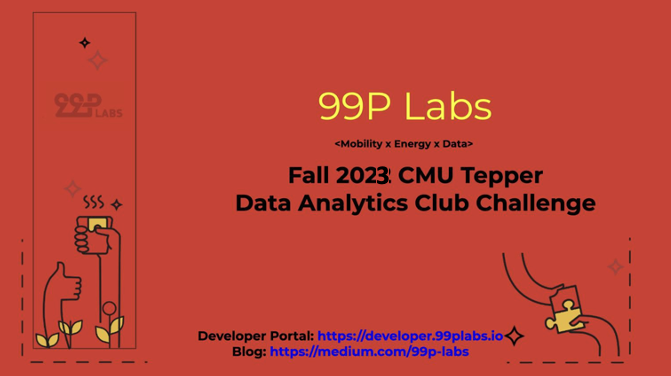

In [2]:
Image(filename='/Users/hyoju/Desktop/Honda Competition/Honda Case Competition.png')

# Introduction

### The graph displays a rising trend in the total sales of electric vehicles from 2010 to 2022, indicating a growing market for BEVs over this period

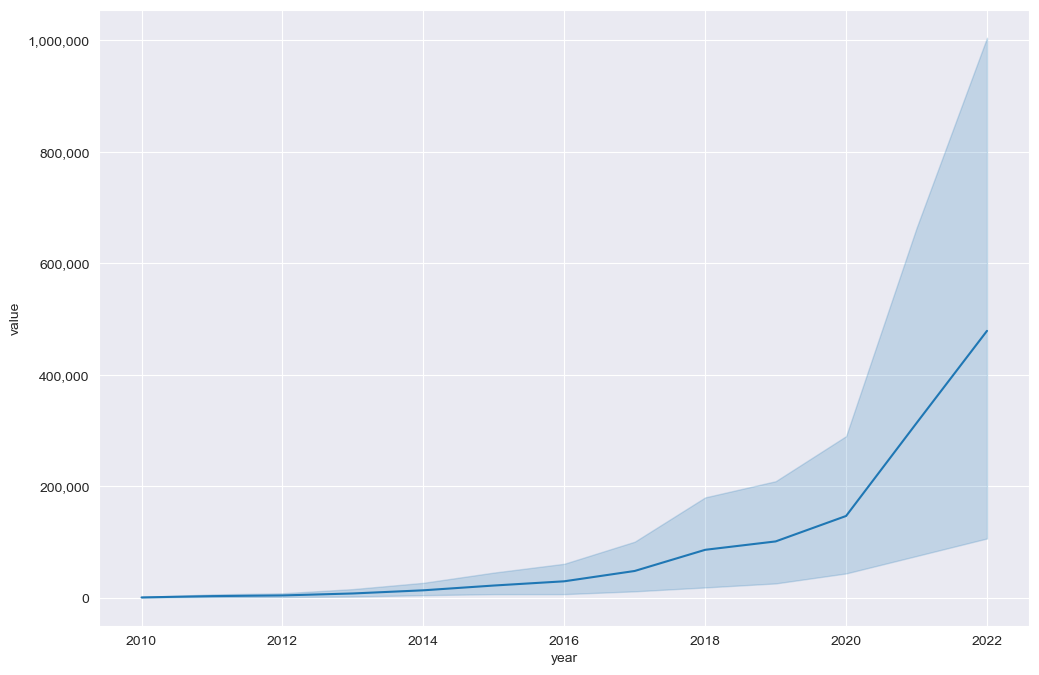

In [3]:
Sales = Sales[Sales['powertrain'] == 'BEV']
without_world = Sales[Sales['region']!='World'].sort_values(by=['value'], ascending=False)

plt.figure(figsize=(12, 8))

def format_y_ticks(value, _):
    return f"{int(value):,}"

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_ticks))

#sns.linplot gives 95% confidence interval which is shown as shaded area
sns.lineplot(data=Sales, x='year', y='value')
plt.show()

### The plot illustrates the significantly lower CO2 emissions from all-electric cars compared to other vehicle types, highlighting the environmental benefits of all electric vehicles

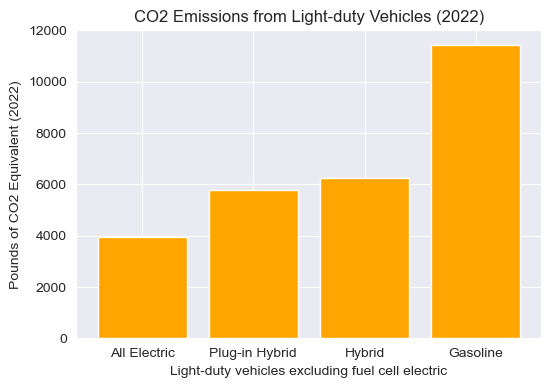

In [4]:
categories = contribution['Light-duty vehicles excluding fuel cell electric']
co2_2022 = contribution['2022 Pounds of CO2 Equivalent']
# Bar positions
bar_positions = range(len(categories))

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(bar_positions, co2_2022, color='orange')

# Add labels and title
plt.xlabel('Light-duty vehicles excluding fuel cell electric')
plt.ylabel('Pounds of CO2 Equivalent (2022)')
plt.title('CO2 Emissions from Light-duty Vehicles (2022)')
plt.xticks(bar_positions, categories)

# Show the plot
plt.show()

### The plot illustrates the cost disparity between gasoline and eGallon (a cost equivalent for electric vehicles) in different U.S. states. It unmistakably shows that, in terms of fuel costs, operating an electric vehicle is typically more cost-effective than running a gasoline-powered vehicle.

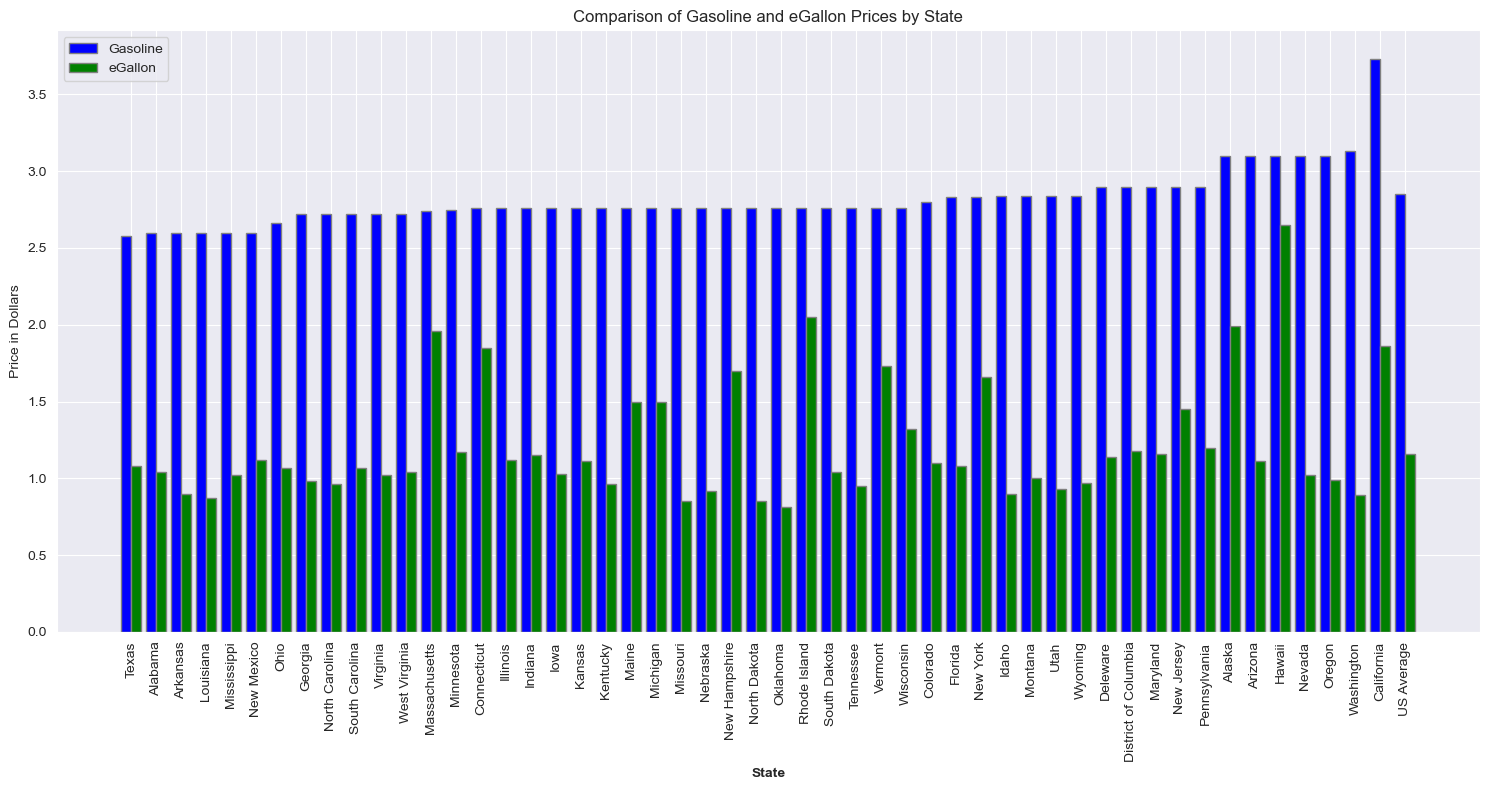

In [5]:
bar_width = 0.4
r1 = range(len(Fuel_Price['State']))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(15, 8))
plt.bar(r1, Fuel_Price['Gasoline (Dollars per Gallon)'], color='blue', width=bar_width, edgecolor='grey', label='Gasoline')
plt.bar(r2, Fuel_Price['Electricity (Dollars per eGallon)'], color='green', width=bar_width, edgecolor='grey', label='eGallon')

plt.xlabel('State', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(Fuel_Price['State']))], Fuel_Price['State'], rotation=90)
plt.ylabel('Price in Dollars')
plt.title('Comparison of Gasoline and eGallon Prices by State')

plt.legend()
plt.tight_layout()
plt.show()

### Based on the results above, our team has strongly concluded that a small company entering and investing in the electric vehicle market is worthwhile due to its high demand, environmental benefits, and cost-effectiveness

In [6]:
#Displaying first five rows of dataframe that has all electric vehicle information 
Alt_data.head(5)

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,21.0,Auto,NaN,SI,3.5L,6.0,NaN,NaN,NaN,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,32.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,31.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,29.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD


In [7]:
#total row in the dataset
Alt_data.shape[0]

882

In [8]:
#Chekcing the dataframe to see how many null values in each columns of the dataframe
Alt_data.isnull().sum()

Category                                0
Model                                   0
Model Year                            288
Manufacturer                            0
Fuel                                    0
All-Electric Range                    660
PHEV Total Range                      839
Alternative Fuel Economy City         713
Alternative Fuel Economy Highway      713
Alternative Fuel Economy Combined     620
Conventional Fuel Economy City        438
Conventional Fuel Economy Highway     438
Conventional Fuel Economy Combined    438
Transmission Type                     242
Transmission Make                     757
Engine Type                           293
Engine Size                           293
Engine Cylinder Count                 433
Number of Passengers                  761
Heavy-Duty Power System               637
Notes                                 703
Drivetrain                            553
dtype: int64

In [9]:
#drop all the unneceessary columns with too many null-values

Alt_data_new = Alt_data.dropna(axis=1, how='any')
Alt_data_new

,Category,Model,Manufacturer,Fuel
0,Sedan/Wagon,NSX,Acura,Hybrid Electric
1,Sedan/Wagon,A3,Audi,Hybrid Electric
2,Sedan/Wagon,A3 quattro,Audi,Hybrid Electric
3,Sedan/Wagon,A4 allroad quattro,Audi,Hybrid Electric
4,Sedan/Wagon,A4 quattro,Audi,Hybrid Electric
...,...,...,...,...
877,Street Sweeper,HSP,TYMCO,CNG - Compressed Natural Gas
878,Step Van,(various models),Utilimaster,Electric
879,Transit Bus,CX45E,Van Hool,Electric
880,Tractor,VNR Electric - Class 8,Volvo,Electric


### The plot indicates that the leading manufacturers in the market include Ford, Tesla, BYD, among others, showcasing the dominance of these brands in the industry

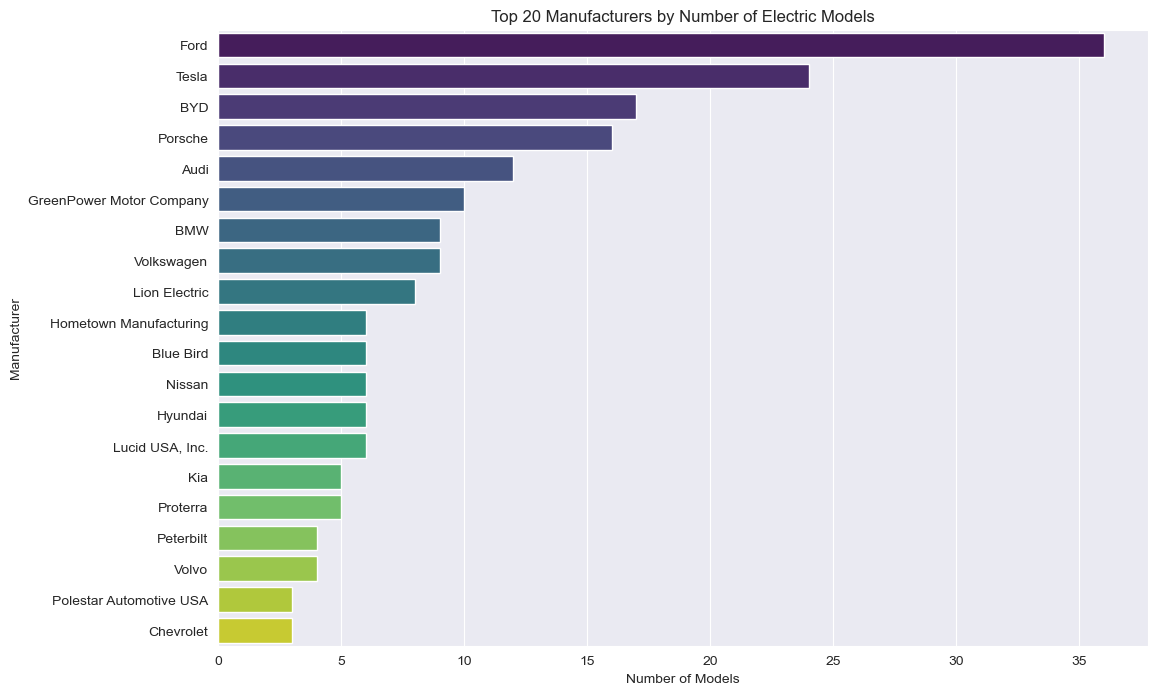

In [10]:
#Focus only on Electric fuel type since our company is a BEV companny
#Then find the top 20 competitiors that offers variety of models(options) 
#to consumers
BEV = Alt_data_new[Alt_data_new['Fuel'] == 'Electric']
make_counts_top20 = BEV['Manufacturer'].value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=make_counts_top20.values, y=make_counts_top20.index, palette="viridis")
plt.title('Top 20 Manufacturers by Number of Electric Models')
plt.xlabel('Number of Models')
plt.ylabel('Manufacturer')
plt.show()

In [11]:
#Displaying first five rows of dataframe that has all electric vehicle purchase history in Washington State

electric_pop.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C03P,King,Seattle,WA,98177.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,36.0,218985539,POINT (-122.38242499999996 47.77279000000004),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1FMCU0EZXN,Yakima,Moxee,WA,98936.0,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,15.0,197264322,POINT (-120.37951169999997 46.55609000000004),PACIFICORP,5.307700e+10
2,1G1FW6S03J,King,Seattle,WA,98117.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,168549727,POINT (-122.37275999999997 47.689685000000054),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJSA1AC0D,King,Newcastle,WA,98059.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41.0,244891062,POINT (-122.15733999999998 47.487175000000036),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1FADP5CU8F,Kitsap,Bremerton,WA,98312.0,2015,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,26.0,134915000,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


In [12]:
electric_pop.shape[0]

143596

In [13]:
#Looks like there is very small number of null values, but after manually
#looking at the dataset, there are tons of meaningless 0 values
electric_pop.isnull().sum()

VIN (1-10)                                             0
County                                                22
City                                                  22
State                                                  0
Postal Code                                           22
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 327
DOL Vehicle ID                                         0
Vehicle Location                                      25
Electric Utility                                      22
2020 Census Tract                                     22
dtype: int64

In [14]:
#Since we only need several columns, we are dropping the rest
#Then filter the table only with BEV electric vehicle type
selected_columns = ['Make', 'Model', 'Electric Vehicle Type', 'Electric Range']
electric_pop_new = electric_pop[selected_columns]

electric_BEV = electric_pop_new[electric_pop_new['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
electric_BEV

,Make,Model,Electric Vehicle Type,Electric Range
2,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),238
3,TESLA,MODEL S,Battery Electric Vehicle (BEV),208
5,BMW,IX,Battery Electric Vehicle (BEV),0
7,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220
8,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220
...,...,...,...,...
143589,TESLA,MODEL Y,Battery Electric Vehicle (BEV),291
143590,TESLA,MODEL 3,Battery Electric Vehicle (BEV),0
143591,AUDI,E-TRON,Battery Electric Vehicle (BEV),0
143593,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),259


### The plot reveals that Tesla, Nissan, Chevrolet, and others are the top electric vehicle (EV) sellers in Washington State. Combined with insights from the previous plot showing leading manufacturers, it's evident that Tesla and Ford not only leads in manufacturing but also excels in sales within the state. This dual leadership position suggests that their strategies are highly effective, giving it a competitive edge in the market

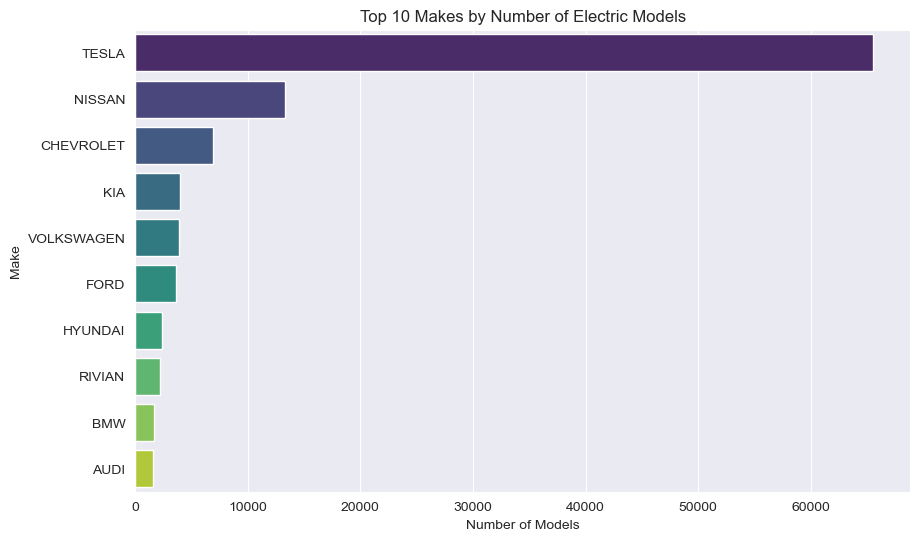

In [15]:
#Finding the top 10 electric vehicle seller in the market (Washington)
make_counts_top10 = electric_BEV['Make'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=make_counts_top10.values, y=make_counts_top10.index, palette="viridis")
plt.title('Top 10 Makes by Number of Electric Models')
plt.xlabel('Number of Models')
plt.ylabel('Make')
plt.show()

In [16]:
#Now, we only want to see top 10 competitiors of ours in the EV market
selected_makes = ["TESLA", "CHEVROLET", "NISSAN", "KIA", "VOLKSWAGEN", "FORD", "HYUNDAI", "RIVIAN", "BMW", "AUDI"]
filtered_BEV = electric_BEV[electric_BEV['Make'].isin(selected_makes)]
filtered_BEV

,Make,Model,Electric Vehicle Type,Electric Range
2,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),238
3,TESLA,MODEL S,Battery Electric Vehicle (BEV),208
5,BMW,IX,Battery Electric Vehicle (BEV),0
7,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220
8,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220
...,...,...,...,...
143589,TESLA,MODEL Y,Battery Electric Vehicle (BEV),291
143590,TESLA,MODEL 3,Battery Electric Vehicle (BEV),0
143591,AUDI,E-TRON,Battery Electric Vehicle (BEV),0
143593,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),259


In [17]:
#Filterd_BEV table is filtered again by grouping 'Make' and 'Model'
#and showing the aggregated sales count per specific model. 
#We want to see how many BEV models top 10 sellers sold in the EV market
grouped_BEV = filtered_BEV.groupby(['Make', 'Model']).agg({'Make': 'size'})
grouped_BEV.columns = ['Sales Count']
grouped_BEV.sort_values(by='Make', ascending=False, inplace=True)
grouped_BEV.reset_index(inplace=True)
grouped_BEV

,Make,Model,Sales Count
0,VOLKSWAGEN,ID.4,2839
1,VOLKSWAGEN,E-GOLF,1075
2,TESLA,ROADSTER,48
3,TESLA,MODEL Y,26194
4,TESLA,MODEL X,5002
5,TESLA,MODEL S,7542
6,TESLA,MODEL 3,26766
7,RIVIAN,EDV,283
8,RIVIAN,R1S,611
9,RIVIAN,R1T,1315


In [18]:
#Now, We filter the table again with 'Sales Count' above 500.
#We assumed that EV models sold more than 500 times have reliable information for analysis
last_BEV = grouped_BEV[grouped_BEV['Sales Count'] > 500]
last_BEV.reset_index(inplace=True)
last_BEV = last_BEV.drop('index', axis=1)
last_BEV

,Make,Model,Sales Count
0,VOLKSWAGEN,ID.4,2839
1,VOLKSWAGEN,E-GOLF,1075
2,TESLA,MODEL Y,26194
3,TESLA,MODEL X,5002
4,TESLA,MODEL S,7542
5,TESLA,MODEL 3,26766
6,RIVIAN,R1S,611
7,RIVIAN,R1T,1315
8,NISSAN,LEAF,13093
9,KIA,NIRO,1775


In [19]:
#The feature dataset is already cleaned and downloaded from Kaggle
feature.head(5)

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [20]:
# First, the Name is splitted into two to describe the Make and Model.
# Then drop the original Name column and reorder the column 

feature['Make'] = feature['Name'].str.split().str[0]
feature['Model'] = feature['Name'].str.split(n=1).str[1]
feature.drop('Name', axis=1, inplace=True)
new_column_order = ['Make', 'Model'] + [col for col in feature.columns if col not in ['Make', 'Model']]
feature = feature[new_column_order]
feature.head(5)

,Make,Model,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel,Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault,Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan,Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi,e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche,Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


### The combined table now includes comprehensive feature details for each electric vehicle (EV) that has sold over 500 units, produced by the top 10 best-selling manufacturers

In [21]:
# Only selecting the Make that is correspoding to top 10 sellers's Make

makes_to_keep = ["Tesla", "Chevrolet", "Nissan", "Kia", "Volkswagen", "Ford", "Hyundai", "Rivian", "Bmw", "Audi"]
feature = feature[feature['Make'].isin(makes_to_keep)]

#Merge the corresponding rows between last_BEV table and feature table by
#downloading the feature table as csv file, and we merged the table manually
#since the number of rows is not that much, and it is easier to do it using excel
#Features are based on standard model (not GT or any kinds of customized model)

merged = pd.read_csv('Desktop/Honda Competition/Datasets/Merged.csv')
merged.head(5)

,Make,Model,Body Style,Sales Count,Acceleration (sec),TopSpeed (km/h),Range (km),Efficiency (Wh/km),FastChargeSpeed (km/h),Drive,NumberofSeats,PriceinGermany,PriceinUK,PriceUS ($)
0,VOLKSWAGEN,ID.4,SUV,2839,8.5,160,410,188,500,Rear Wheel Drive,5,0,40800.0,"49,776.00"
1,TESLA,MODEL Y,SUV,26194,5.1,217,450,169,750,All Wheel Drive,7,"€59,965",54000.0,"65,880.00"
2,TESLA,MODEL X,SUV,5002,3.9,250,475,189,710,All Wheel Drive,7,"€95,990",90980.0,"110,995.60"
3,TESLA,MODEL S,Sedan,7542,3.2,250,555,162,830,All Wheel Drive,5,"€86,990",83980.0,"102,455.60"
4,TESLA,MODEL 3,Sedan,26766,5.6,225,340,150,570,Rear Wheel Drive,5,"€43,560",40990.0,"50,007.80"


### This analysis reveals that SUVs lead sales in the electric vehicle (EV) market, followed by Sedans and Hatchbacks. Additionally, the distinct features associated with each EV body type can serve as benchmarks for our company when planning future market entry strategies

In [22]:
#We have the result of customer preference features of BEV 
#after looking at data from top 10 EV sellers in the market grouped by vehicle body type.
#SUV is the most preferable body type, following Sedan and Hatchbag

merged_dropped = merged.drop(columns=['Drive', 'PriceinGermany', 'PriceinUK'])
grouped_df = merged_dropped.groupby('Body Style').agg(
    Total_Sales_Count=('Sales Count', 'sum'),
    Average_Acceleration=('Acceleration (sec)', 'mean'),
    Average_Top_Speed=('TopSpeed (km/h)', 'mean'),
    Average_Electric_Range=('Range (km)', 'mean'),
    Average_Efficiency=('Efficiency (Wh/km)', 'mean'),
    Average_Charging_Speed=('FastChargeSpeed (km/h)', 'mean'),
    Average_Number_of_Seats=('NumberofSeats', 'mean'),
    Average_Price_USD=('PriceUS ($)', lambda x: pd.to_numeric(x.replace('[\$,]', '', regex=True), errors='coerce').mean()))

rounded_df = grouped_df.round(2)
ordered_rounded_df = rounded_df.sort_values(by='Total_Sales_Count', ascending=False)
ordered_rounded_df = ordered_rounded_df.reset_index()
ordered_rounded_df

,Body Style,Total_Sales_Count,Average_Acceleration,Average_Top_Speed,Average_Electric_Range,Average_Efficiency,Average_Charging_Speed,Average_Number_of_Seats,Average_Price_USD
0,SUV,41000,6.88,193.0,383.75,188.75,595.0,5.5,63027.41
1,Sedan,34308,4.40,237.5,447.50,156.00,700.0,5.0,76231.70
2,Hatchbag,14868,7.85,155.5,295.00,168.50,290.0,5.0,35648.40


## Regrssion analysis (Charging Station & Electric population datasets)

In [23]:
#Data importing
#Charging data is US wide dataset
public_charging = pd.read_csv("Desktop/Honda Competition/Datasets/alt_fuel_stations (Nov 10 2023) Public.csv", low_memory=False)
private_charging = pd.read_csv("Desktop/Honda Competition/Datasets/alt_fuel_stations (Nov 10 2023) Private.csv")

In [24]:
#Dropping all the unnecessary columns in the datasets
public_charging_subset = public_charging[['Station Name', 'Street Address', 'City', 'State', 'ZIP', 
                                          'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 
                                          'Latitude', 'Longitude', 'EV Connector Types', 'Facility Type', 
                                          'EV Workplace Charging']]

private_charging_subset = private_charging[['Station Name', 'Street Address', 'City', 'State', 'ZIP', 
                                            'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 
                                            'Latitude', 'Longitude', 'EV Connector Types', 'Facility Type', 
                                            'EV Workplace Charging']]

In [25]:
public_charging_subset = public_charging_subset.copy()

public_charging_subset['ZIP'] = pd.to_numeric(public_charging_subset['ZIP'], errors='coerce').fillna(0).astype(int)

#Joiining two datasets using zip
combined_public_EVpop = pd.merge(public_charging_subset, electric_pop, left_on='ZIP', right_on='Postal Code', how='inner')
combined_public_EVpop.head(3)

,Station Name,Street Address,City_x,State_x,ZIP,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,Latitude,Longitude,...,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,Hyatt Regency Long Beach,200 S Pine Ave,Long Beach,CA,90802,NaN,1.0,NaN,33.763700,-118.192000,...,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,103788282,POINT (-118.1893 33.769135),NON WASHINGTON STATE ELECTRIC UTILITY,6.037576e+09
1,Renaissance Hotel - Long Beach,111 E Ocean Blvd,Long Beach,CA,90802,NaN,2.0,NaN,33.767531,-118.191749,...,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,103788282,POINT (-118.1893 33.769135),NON WASHINGTON STATE ELECTRIC UTILITY,6.037576e+09
2,Renaissance Long Beach Hotel - Tesla Destination,111 E Ocean Blvd,Long Beach,CA,90802,NaN,3.0,NaN,33.767198,-118.191987,...,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,103788282,POINT (-118.1893 33.769135),NON WASHINGTON STATE ELECTRIC UTILITY,6.037576e+09


### Regression Based on ZIP

In [26]:
counts_per_postal = electric_pop.groupby('Postal Code').size().reset_index(name='count')

#counting the number of vehicles per zip code
counts_per_postal = counts_per_postal.sort_values('count', ascending=False)
counts_per_postal

,Postal Code,count
294,98052.0,3689
266,98012.0,2605
281,98033.0,2526
259,98004.0,2372
261,98006.0,2359
...,...,...
122,68135.0,1
124,70461.0,1
125,71446.0,1
127,73521.0,1


In [27]:
#counting the unmber of public charging station per zip code
public_charging_counts = public_charging_subset.groupby('ZIP').size().reset_index(name='count')
public_charging_counts = public_charging_counts.sort_values('count', ascending=False)
public_charging_counts

,ZIP,count
9513,94025,359
9701,95054,282
9264,92618,279
10227,98004,157
9131,92101,151
...,...,...
6383,60402,1
6382,60305,1
1796,14418,1
1798,14422,1


In [28]:
public_charging_counts['ZIP'] = public_charging_counts['ZIP'].astype(float)
counts_per_postal['Postal Code'] = counts_per_postal['Postal Code'].astype(float)

#Joinning two results
combined_public_EVpop = pd.merge(public_charging_counts, counts_per_postal, left_on='ZIP', right_on='Postal Code', how='inner')

combined_public_EVpop = combined_public_EVpop[['ZIP', 'count_x', 'count_y']]
combined_public_EVpop.columns = ['ZIP', 'ChargingCounts', 'VehicleCounts']

combined_public_EVpop

,ZIP,ChargingCounts,VehicleCounts
0,95054.0,282,1
1,92618.0,279,1
2,98004.0,157,2372
3,92101.0,151,1
4,98121.0,107,651
...,...,...,...
490,70461.0,1,1
491,78414.0,1,1
492,80547.0,1,1
493,55408.0,1,1


### This summary shows that almost all variables are statistically insignificant at the 5% significane level, indicating weak or non-existent relationships between vehicle ownership and charging stations at the zip code level. Also, the R^2 values were notably minimal, suggesting that the variavles inadequately explained the variability in vehicle ownership

In [29]:
print(combined_public_EVpop.isnull().sum())

X = combined_public_EVpop['ChargingCounts']
y = combined_public_EVpop['VehicleCounts']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

ZIP               0
ChargingCounts    0
VehicleCounts     0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:          VehicleCounts   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.914
Date:                Sat, 02 Dec 2023   Prob (F-statistic):             0.0884
Time:                        14:42:17   Log-Likelihood:                -3749.7
No. Observations:                 495   AIC:                             7503.
Df Residuals:                     493   BIC:                             7512.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

### The increased granularity of zip codes, where individuals traverse multiple zip codes when seeking charging stations, emphasized the need for a broder scope of analysis at the county level, which more accurately reflects the spatial behaviors of individuals in search of charging stations. So, we concluded that the county-level aggregation emerged as a more appropriate approach to capture the spatial nuances and derive meaningful insights.

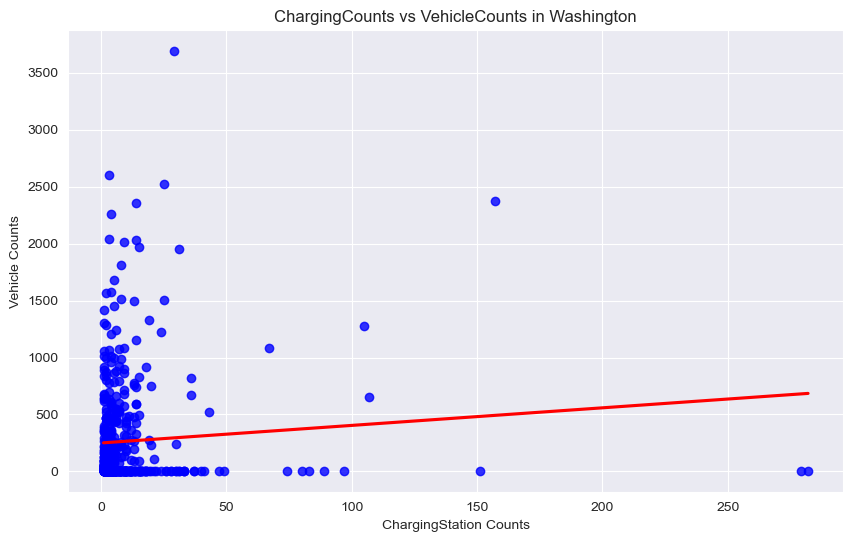

In [30]:
plt.figure(figsize=(10, 6))
sns.regplot(data=combined_public_EVpop, x='ChargingCounts', y='VehicleCounts', ci=None, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('ChargingCounts vs VehicleCounts in Washington')
plt.xlabel('ChargingStation Counts')
plt.ylabel('Vehicle Counts')

plt.show()

### Run Regression on County level

In [31]:
electric_pop_grouped = electric_pop.groupby('County').size().reset_index(name='count')
electric_pop_grouped

,County,count
0,Adams,41
1,Alameda,3
2,Alexandria,3
3,Allen,1
4,Anne Arundel,10
...,...,...
165,Williamson,1
166,Wilson,1
167,Yakima,782
168,Yavapai,1


In [32]:
public_charging_grouped = pd.merge(public_charging_subset, electric_pop, left_on='ZIP', right_on='Postal Code', how='left')
public_charging_grouped = public_charging_grouped.groupby('County').size().reset_index(name='count')
public_charging_grouped

,County,count
0,Adams,50
1,Alameda,15
2,Alexandria,12
3,Allen,10
4,Anne Arundel,86
...,...,...
137,Whitman,1957
138,Williamson,8
139,Yakima,2851
140,Yavapai,9


In [33]:
combined_public_EVpop_county = pd.merge(public_charging_grouped, electric_pop_grouped, on='County', how='inner')

combined_public_EVpop_county.columns = ['County', 'ChargingCounts', 'VehicleCounts']
combined_public_EVpop_county

,County,ChargingCounts,VehicleCounts
0,Adams,50,41
1,Alameda,15,3
2,Alexandria,12,3
3,Allen,10,1
4,Anne Arundel,86,10
...,...,...,...
137,Whitman,1957,249
138,Williamson,8,1
139,Yakima,2851,782
140,Yavapai,9,1


### Now, as we expect, the model explains that the total number of charging stations within a county can account for approximately  95.4% of the total variance in vehicle ownership, with a p-value of 0. 

In [34]:
print(combined_public_EVpop_county.isnull().sum())

X = combined_public_EVpop_county['ChargingCounts']
y = combined_public_EVpop_county['VehicleCounts']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

County            0
ChargingCounts    0
VehicleCounts     0
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          VehicleCounts   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2917.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.25e-95
Time:                        14:42:18   Log-Likelihood:                -1230.3
No. Observations:                 142   AIC:                             2465.
Df Residuals:                     140   BIC:                             2471.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            329.1395    119.096      2.764      0.006      93.680     564.599
ChargingCounts     0.0562      0.001     54.009      0.000       0.054       0.058
==============================================================================
Omnibus:                      212.332   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12011.595
Skew:                           6.303   Prob(JB):                         0.00
Kurtosis:                      46.258   Cond. No.                     1.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

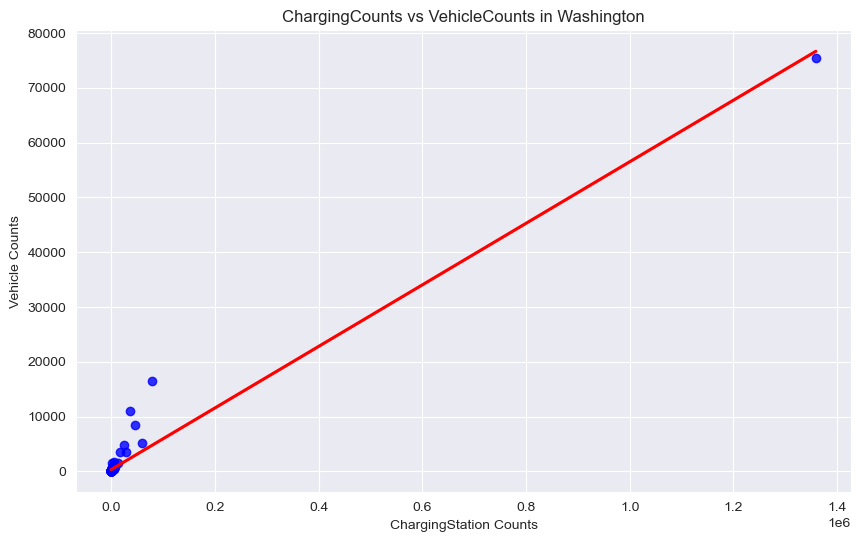

In [35]:
plt.figure(figsize=(10, 6))
sns.regplot(data=combined_public_EVpop_county, x='ChargingCounts', y='VehicleCounts', ci=None, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('ChargingCounts vs VehicleCounts in Washington')
plt.xlabel('ChargingStation Counts')
plt.ylabel('Vehicle Counts')

plt.show()

### Enhanced Analysis: Regression on Charging Type in Public Dataset

In [36]:
counts_per_county = public_charging_subset.groupby('ZIP').agg(
    Level1_Count=('EV Level1 EVSE Num', lambda x: x.notna().sum()),
    Level2_Count=('EV Level2 EVSE Num', lambda x: x.notna().sum()),
    DC_Fast_Count=('EV DC Fast Count', lambda x: x.notna().sum())
).reset_index()

counts_per_county
counts_per_county.to_csv('counts_per_county.csv', index=False)

In [37]:
joined_dataset = pd.merge(counts_per_county, electric_pop, left_on='ZIP', right_on='Postal Code', how='left')
joined_dataset

,ZIP,Level1_Count,Level2_Count,DC_Fast_Count,VIN (1-10),County,City,State,Postal Code,Model Year,...,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,0,0,8,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,214,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,612,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,662,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,680,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141269,99729,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141270,99743,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141271,99755,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141272,99801,0,13,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
result = joined_dataset.groupby('County').agg(
    Level1_Count=('Level1_Count', 'sum'),
    Level2_Count=('Level2_Count', 'sum'),
    DC_Fast_Count=('DC_Fast_Count', 'sum'),
    count=('County', 'size')
).reset_index()

result = result[['County', 'Level1_Count', 'Level2_Count', 'DC_Fast_Count']].dropna()
result

,County,Level1_Count,Level2_Count,DC_Fast_Count
0,Adams,0,2,48
1,Alameda,0,14,2
2,Alexandria,0,9,6
3,Allen,0,10,0
4,Anne Arundel,1,77,18
...,...,...,...,...
137,Whitman,0,1755,202
138,Williamson,0,7,2
139,Yakima,0,2184,892
140,Yavapai,0,8,1


In [39]:
joined_dataset_county = pd.merge(result, electric_pop_grouped, on='County', how='inner')

### Here, we noticed a trend that Level 2 and DC Fast chargers are important independent variables with significantly low p-values. This emphasizes the pivotal role of sophisticated charging infrastructures, such as Level 2 and DC Fast chargers, in fostering the proliferation on EVs. 

In [40]:
X = joined_dataset_county[['Level1_Count', 'Level2_Count', 'DC_Fast_Count']]
y = joined_dataset_county['count']

X = sm.add_constant(X)

model3 = sm.OLS(y, X).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2275.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          2.92e-117
Time:                        14:42:19   Log-Likelihood:                -1170.8
No. Observations:                 142   AIC:                             2350.
Df Residuals:                     138   BIC:                             2361.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           123.0333     80.902      1.521      0.131     -36.935     283.002
Level1_Count     -3.8623      1.967     -1.963      0.052      -7.752       0.027
Level2_Count      0.0272      0.009      3.166      0.002       0.010       0.044
DC_Fast_Count     0.6807      0.061     11.130      0.000       0.560       0.802
==============================================================================
Omnibus:                      143.734   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7033.780
Skew:                           3.156   Prob(JB):                         0.00
Kurtosis:                      36.896   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Expanding our scrutiny to encompass private charging stations, as delineated in Appendix 10, a similar trend emerges. Private charging stations emerge as profoundly influential, evidenced by a coefficient of 2.2167. This implies that for each additional unit of private charging station, an estimated increase of approximately 2 cars in vehicle ownership is anticipated

In [41]:
result = private_charging_subset.agg({
    'EV Level1 EVSE Num': lambda x: x.notna().sum(),
    'EV Level2 EVSE Num': lambda x: x.notna().sum(),
    'EV DC Fast Count': lambda x: x.notna().sum()
})

result = result.rename({
    'EV Level1 EVSE Num': 'Level1_Count',
    'EV Level2 EVSE Num': 'Level2_Count',
    'EV DC Fast Count': 'DC_Fast_Count'
})

print(result)

Level1_Count      496
Level2_Count     3271
DC_Fast_Count     129
dtype: int64


In [42]:
private_charging_subset = private_charging[['Station Name', 'Street Address', 'City', 'State', 'ZIP', 
                                            'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 
                                            'Latitude', 'Longitude', 'EV Connector Types', 'Facility Type', 
                                            'EV Workplace Charging']].copy()

private_charging_subset['ZIP'] = pd.to_numeric(private_charging_subset['ZIP'], errors='coerce')

private_charging_grouped = pd.merge(private_charging_subset, electric_pop, left_on='ZIP', right_on='Postal Code', how='left')

private_charging_grouped.head(5)

,Station Name,Street Address,City_x,State_x,ZIP,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,Latitude,Longitude,...,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,NaN,57.0,2.0,34.248319,-118.387971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,NaN,4.0,NaN,34.052542,-118.448504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,NaN,338.0,12.0,34.059133,-118.248589,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,NaN,19.0,1.0,33.759802,-118.096665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LADWP - Harbor Generating Station,161 N Island Ave,Wilmington,CA,90744,NaN,10.0,NaN,33.770508,-118.265628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
private_charging_grouped = private_charging_grouped.groupby('County').size().reset_index(name='ChargingCounts')

combined_private_EVpop_county = pd.merge(private_charging_grouped, electric_pop_grouped, on='County', how='inner')
combined_private_EVpop_county.columns = ['County', 'ChargingCounts', 'VehicleCounts']

combined_private_EVpop_county.head()

,County,ChargingCounts,VehicleCounts
0,Alexandria,3,3
1,Anne Arundel,9,10
2,Benton,12897,1757
3,Bexar,1,4
4,Boulder,4,1


In [44]:
import statsmodels.api as sm

X = combined_private_EVpop_county['ChargingCounts']
Y = combined_private_EVpop_county['VehicleCounts']

X = sm.add_constant(X)

model4 = sm.OLS(Y, X).fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          VehicleCounts   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     283.5
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           5.95e-26
Time:                        14:42:19   Log-Likelihood:                -680.91
No. Observations:                  70   AIC:                             1366.
Df Residuals:                      68   BIC:                             1370.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            158.7803    503.685      0.315      0.754    -846.307    1163.868
ChargingCounts     2.2167      0.132     16.837      0.000       1.954       2.479
==============================================================================
Omnibus:                       87.016   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2389.489
Skew:                          -3.247   Prob(JB):                         0.00
Kurtosis:                      30.876   Cond. No.                     3.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
counts_per_county = private_charging_subset.groupby('ZIP').agg(
    Level1_Count=pd.NamedAgg(column='EV Level1 EVSE Num', aggfunc=lambda x: x.notna().sum()),
    Level2_Count=pd.NamedAgg(column='EV Level2 EVSE Num', aggfunc=lambda x: x.notna().sum()),
    DC_Fast_Count=pd.NamedAgg(column='EV DC Fast Count', aggfunc=lambda x: x.notna().sum())
).reset_index()

counts_per_county

,ZIP,Level1_Count,Level2_Count,DC_Fast_Count
0,965,1,0,0
1,1002,0,1,0
2,1022,1,0,0
3,1035,0,2,0
4,1040,0,1,0
...,...,...,...,...
2452,99501,0,1,0
2453,99603,0,1,0
2454,99645,1,0,0
2455,99801,0,1,0


In [46]:
joined_dataset = pd.merge(counts_per_county, electric_pop, left_on='ZIP', right_on='Postal Code', how='left')

result = joined_dataset.groupby('County').agg(
    Level1_Count=pd.NamedAgg(column='Level1_Count', aggfunc='sum'),
    Level2_Count=pd.NamedAgg(column='Level2_Count', aggfunc='sum'),
    DC_Fast_Count=pd.NamedAgg(column='DC_Fast_Count', aggfunc='sum'),
    count=pd.NamedAgg(column='County', aggfunc='size')
).reset_index()

result = result[['County', 'Level1_Count', 'Level2_Count', 'DC_Fast_Count']]

result = result.dropna()

result.head()

,County,Level1_Count,Level2_Count,DC_Fast_Count
0,Alexandria,0,3,0
1,Anne Arundel,1,9,0
2,Benton,5704,9921,0
3,Bexar,0,1,0
4,Boulder,0,4,0


In [47]:
joined_dataset_county = pd.merge(result, electric_pop_grouped, on='County', how='inner')

joined_dataset_county.head()

,County,Level1_Count,Level2_Count,DC_Fast_Count,count
0,Alexandria,0,3,0,3
1,Anne Arundel,1,9,0,10
2,Benton,5704,9921,0,1757
3,Bexar,0,1,0,4
4,Boulder,0,4,0,1


### It is apparent that only Level 1 and Level 2 chargers exhibit significance, as indicated by the p-values. However, the negative coefficient attributed to Level 1 charging stations is not an anomaly but aligns with our initial discovery that EV owners tend to prefer at least Level 2 chargers in their residential premises due to the protracted duration required for full charging by standard Level 1 chargers. Given that most Level 1 chargers are provided as a complimentary addition during an EV purchase, this trend does not come as a surprise.

In [48]:
X = joined_dataset_county[['Level1_Count', 'Level2_Count', 'DC_Fast_Count']]
Y = joined_dataset_county['count']

X = sm.add_constant(X)

model5 = sm.OLS(Y, X).fit()

model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     386.5
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           8.60e-42
Time:                        14:42:20   Log-Likelihood:                -636.14
No. Observations:                  70   AIC:                             1280.
Df Residuals:                      66   BIC:                             1289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           642.8712    275.464      2.334      0.023      92.890    1192.853
Level1_Count     -4.0312      0.398    -10.120      0.000      -4.826      -3.236
Level2_Count      2.7412      0.083     32.924      0.000       2.575       2.907
DC_Fast_Count    -1.0238      1.359     -0.753      0.454      -3.737       1.689
==============================================================================
Omnibus:                       88.285   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              998.712
Skew:                           3.908   Prob(JB):                    1.36e-217
Kurtosis:                      19.773   Cond. No.                     3.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Additional Analysis on the Charging Stations Datasets

In [49]:
summary_result = (public_charging_subset.groupby('EV Connector Types')
                  .size()
                  .reset_index(name='count')
                  .drop_duplicates()
                  .sort_values('count', ascending=False)
                  .reset_index(drop=True))

summary_result

,EV Connector Types,count
0,J1772,46272
1,TESLA,4161
2,CHADEMO J1772COMBO,4007
3,J1772 TESLA,2247
4,J1772COMBO,1086
5,CHADEMO J1772 J1772COMBO,814
6,CHADEMO J1772,270
7,J1772 J1772COMBO,154
8,J1772 NEMA520,41
9,NEMA1450,36


In [50]:
exploded = public_charging_subset.assign(
    **{'EV Connector Types': public_charging_subset['EV Connector Types'].str.split(' ')}
).explode('EV Connector Types')

filtered = exploded[exploded['EV Connector Types'].isin(['J1772', 'CCS', 'CHAdeMO', 'NACS'])]

summary_result = (filtered.groupby('EV Connector Types')
                  .size()
                  .reset_index(name='count')
                  .sort_values(by='count', ascending=False)
                  .reset_index(drop=True))

summary_result

,EV Connector Types,count
0,J1772,49835


### Summary of Most Popular Charging Types from the Public Charging Dataset

In [51]:
exploded = (public_charging_subset
            .assign(EV_Connector_Types=public_charging_subset['EV Connector Types'].str.lower().str.split(" "))
            .explode('EV_Connector_Types'))

connector_types = ["j1772", "ccs", "chademo", "nacs", "tesla", "nema1450", "nema515", "nema520", "j1772combo"]

exploded['Type_Category'] = exploded['EV_Connector_Types'].apply(lambda x: x if x in connector_types else 'other')

summary_result = (exploded.groupby('Type_Category')
                  .size()
                  .reset_index(name='count')
                  .sort_values(by='count', ascending=False)
                  .reset_index(drop=True))
summary_result

,Type_Category,count
0,j1772,49835
1,tesla,6429
2,j1772combo,6080
3,chademo,5130
4,nema520,76
5,nema1450,47
6,nema515,30
7,other,22


### Summary of Most Popular Charging Types from the Private Charging Dataset

In [52]:
connector_types = ["j1772", "ccs", "chademo", "nacs", "tesla", "nema1450", "nema515", "nema520", "j1772combo"]

exploded = (
    private_charging_subset
    .assign(EV_Connector_Types=private_charging_subset['EV Connector Types'].str.lower().str.split(" "))
    .explode('EV_Connector_Types')
)

exploded['Type_Category'] = exploded['EV_Connector_Types'].apply(
    lambda x: x if x in connector_types else 'other'
)

summary_result = (
    exploded.groupby('Type_Category')
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .reset_index(drop=True)
)

summary_result

,Type_Category,count
0,j1772,3261
1,nema515,251
2,nema1450,123
3,nema520,108
4,j1772combo,105
5,chademo,61
6,tesla,22
7,other,8


### Summary of Facility Types from Public Charging Dataset

In [53]:
summary_result = (public_charging_subset.groupby('Facility Type')
                  .size()  
                  .reset_index(name='count') 
                  .drop_duplicates()  
                  .sort_values('count', ascending=False)  
                  .dropna()  
                  .reset_index(drop=True))  

summary_result.head(10)

,Facility Type,count
0,HOTEL,2870
1,CAR_DEALER,1788
2,PARKING_LOT,818
3,PUBLIC,739
4,SHOPPING_CENTER,593
5,MUNI_GOV,510
6,COLLEGE_CAMPUS,418
7,PARKING_GARAGE,415
8,PAY_GARAGE,392
9,RESTAURANT,372


### Summary of Facility Types from Private Charging Dataset

In [54]:

summary_result = (private_charging_subset.groupby('Facility Type')
                  .size() 
                  .reset_index(name='count')  
                  .drop_duplicates()  
                  .sort_values('count', ascending=False)  
                  .reset_index(drop=True))  

summary_result.head(10)

,Facility Type,count
0,CAR_DEALER,974
1,FED_GOV,847
2,OFFICE_BLDG,525
3,UTILITY,335
4,MUNI_GOV,179
5,NATL_PARK,92
6,COLLEGE_CAMPUS,77
7,STATE_GOV,70
8,HOSPITAL,58
9,PARKING_GARAGE,58


### Summary of Availability of Workplace Charging from Public Charging Dataset

In [55]:
summary_result = (public_charging_subset.groupby('EV Workplace Charging')
                  .size()  
                  .reset_index(name='count')  
                  .drop_duplicates() 
                  .sort_values('count', ascending=False) 
                  .reset_index(drop=True))
summary_result

,EV Workplace Charging,count
0,False,58970
1,True,265


### Summary of Availability of Workplace Charging from Private Charging Dataset

In [56]:

summary_result = (private_charging_subset.groupby('EV Workplace Charging')
                  .size() 
                  .reset_index(name='count')
                  .drop_duplicates()
                  .sort_values('count', ascending=False)
                  .reset_index(drop=True))
summary_result

,EV Workplace Charging,count
0,False,2594
1,True,1118
